In [18]:
import tensorflow as tf
import numpy as np
import collections
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Dropout

In [19]:
def read_data(fname):
    with open(fname, encoding='utf-8') as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    words = []
    for line in content:
        words.extend(line.split())
    return np.array(words)

In [20]:
def build_dataset(words):
    count = collections.Counter(words).most_common()
    word2id = {}
    for word, freq in count:
        word2id[word] = len(word2id)
    id2word = dict(zip(word2id.values(), word2id.keys()))
    return word2id, id2word

In [21]:
data = read_data('text.txt')
print(data)
w2i , i2w = build_dataset(data)
vocab_size = len(w2i)
timestep = 3

['long' 'ago,' 'the' 'mice' 'had' 'a' 'general' 'council' 'to' 'consider'
 'what' 'measures' 'they' 'could' 'take' 'to' 'outwit' 'their' 'common'
 'enemy,' 'the' 'cat.' 'some' 'said' 'this,' 'and' 'some' 'said' 'that'
 'but' 'at' 'last' 'a' 'young' 'mouse' 'got' 'up' 'and' 'said' 'he' 'had'
 'a' 'proposal' 'to' 'make,' 'which' 'he' 'thought' 'would' 'meet' 'the'
 'case.' 'you' 'will' 'all' 'agree,' 'said' 'he,' 'that' 'our' 'chief'
 'danger' 'consists' 'in' 'the' 'sly' 'and' 'treacherous' 'manner' 'in'
 'which' 'the' 'enemy' 'approaches' 'us.' 'now,' 'if' 'we' 'could'
 'receive' 'some' 'signal' 'of' 'her' 'approach,' 'we' 'could' 'easily'
 'escape' 'from' 'her.' 'i' 'venture,' 'therefore,' 'to' 'propose' 'that'
 'a' 'small' 'bell' 'be' 'procured,' 'and' 'attached' 'by' 'a' 'ribbon'
 'round' 'the' 'neck' 'of' 'the' 'cat.' 'by' 'this' 'means' 'we' 'should'
 'always' 'know' 'when' 'she' 'was' 'about,' 'and' 'could' 'easily'
 'retire' 'while' 'she' 'was' 'in' 'the' 'neighborhood.' 'this' '

In [22]:
print(vocab_size)
print(len(data))

114
181


In [23]:
X, Y = [], []
for i in range(timestep, len(data)):
    X.append([w2i[data[k]] for k in range(i-timestep, i)])
    Y.append(w2i[data[i]])


In [24]:
encoded_data = [w2i[x] for x in data]
X = encoded_data[:-1]
Y = encoded_data[timestep:]
train_data = tf.keras.preprocessing.timeseries_dataset_from_array(X, Y,  sequence_length=timestep, sampling_rate=1)

In [25]:
print(len(encoded_data))

181


In [26]:
model = tf.keras.Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(timestep, 1)))
model.add(LSTM(512, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

/Users/ConCa/Documents/DeepLearning/Assignment/LSTM/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 3, 512)         │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 114)            │        58,482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210,354 (12.25 MB)

 Trainable params: 3,210,354 (12.25 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, epochs=300)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.0239 - loss: 4.7517
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0531 - loss: 4.5342
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0531 - loss: 4.4958
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0785 - loss: 4.4497
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0733 - loss: 4.4156
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0733 - loss: 4.3544
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0860 - loss: 4.2699
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1099 - loss: 4.1695
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1136 - loss: 4.0426
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1174 - loss: 3.9023
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1275 - loss: 3.7551
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1387 - lo

In [28]:
model.evaluate(train_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9492 - loss: 0.1050 


[0.09471665322780609, 0.9550561904907227]

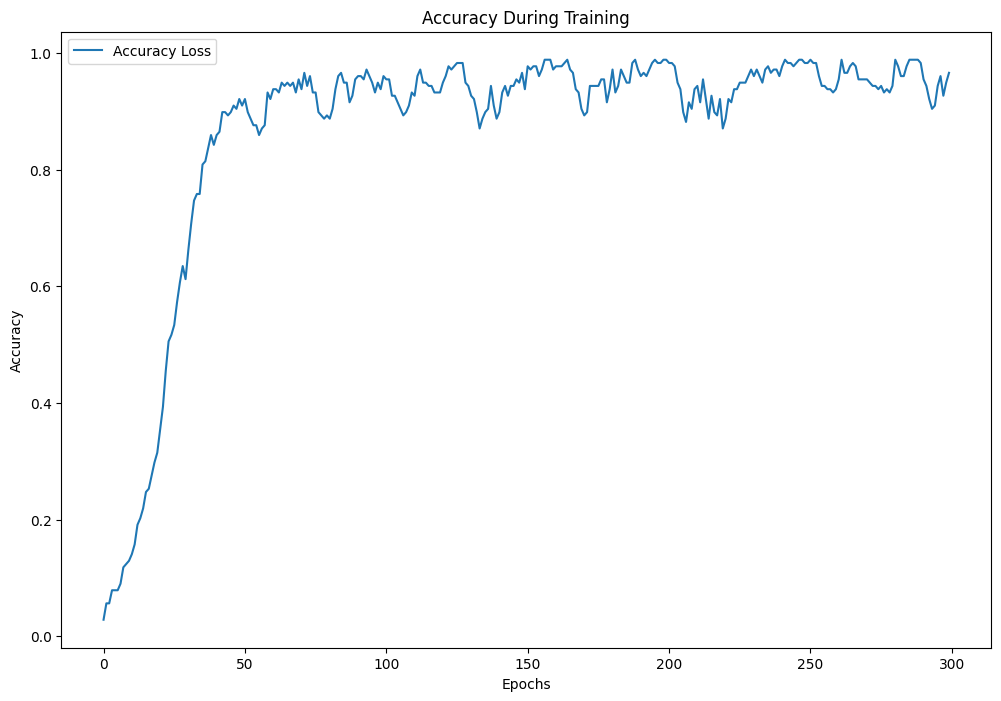

In [29]:
plt.figure(figsize=(12, 8))

# Plot the loss graph
plt.plot(history.history['accuracy'], label='Accuracy Loss')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:

def encode(sent):
    return np.array([[w2i[w] for w in sent.split()]])


pred = model.predict(encode("a general council"))
pred_word = i2w[np.argmax(pred)]
print(pred_word)

pred = model.predict(encode("general council to"))
pred_word = i2w[np.argmax(pred)]
print(pred_word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
consider


In [31]:
model.save('words.h5')

In [32]:
sentence = []

firstWords = 'it is easy to'

encoded_words = encode(firstWords)
for word in encoded_words[0]:
    print(i2w[word])
    sentence.append(i2w[word])

s = ' '.join(sentence)
print(s)

it
is
easy
to
it is easy to


In [33]:
# print(encoded_words)

In [34]:
def MakePrediction(firstWords): 
    sentence = []
    sentence.extend(firstWords.split())
        
    while len(sentence) <= 10:
        
        X = sentence[-3:]
        
        y_pred = model.predict(encode(' '.join(X)))
        pred_word = i2w[np.argmax(y_pred)]
        
        sentence.append(pred_word)
        
    complete_sentence = ' '.join(sentence)
    return complete_sentence

In [35]:
print(MakePrediction("treacherous manner in"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
treacherous manner in which the enemy approaches us. now, we could
